In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fitting periodic function 

In [3]:
maxt = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mint = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

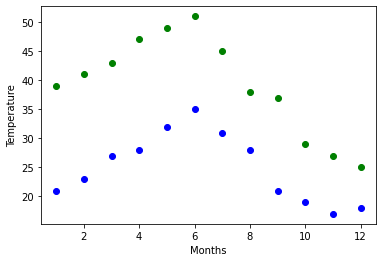

In [4]:
plt.Figure(figsize=(8,6))
plt.plot(months, maxt, 'go')
plt.plot(months, mint, 'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.show()

In [5]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,maxt, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,mint, [-40, 20, 0])

Text(0, 0.5, "Temperature( 'c)")

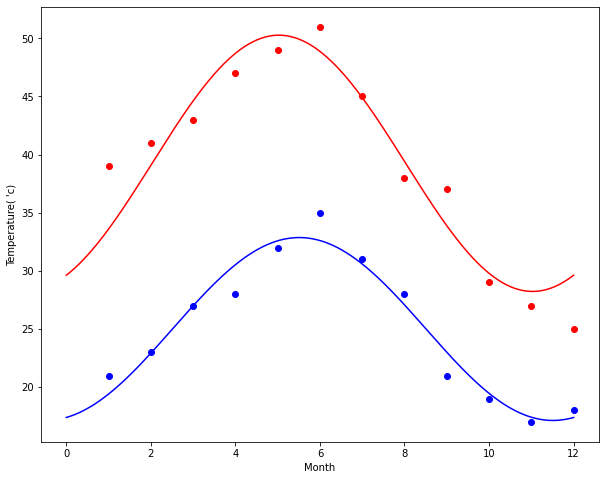

In [6]:
days = np.linspace(0,12, num =365)
plt.figure(figsize = (10,8))
plt.plot(months , maxt, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months , mint, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel("Temperature( 'c)")

# 2. Male/Female proportion 

In [7]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic_gender = round(titanic['sex'].value_counts())
tg = pd.DataFrame(titanic_gender)
tg

,sex
male,843
female,466


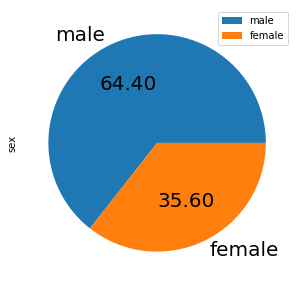

In [9]:
tg.plot(kind = 'pie', figsize = (5,5), fontsize='20' , autopct = '%.2f', subplots=True)
plt.show()

# 3. Scatterplot with the Fare paid and  Age, differ the plot color by gender

In [10]:
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
gender.head()

0    0
1    1
2    0
3    1
4    0
dtype: int8

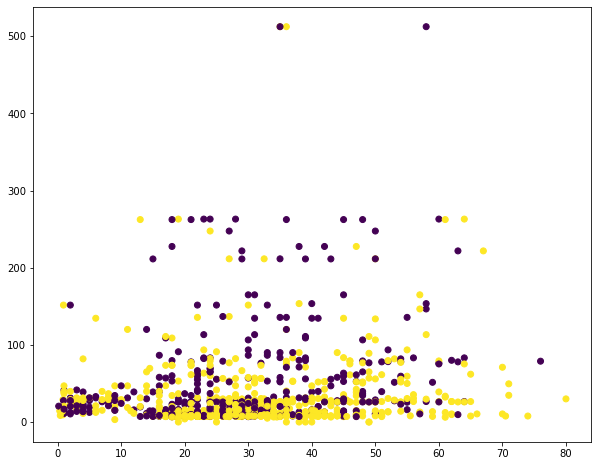

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(titanic['age'] , titanic['fare'], c = gender)